# Calculate maximum weights from SARSA
#### Created on: 2021.01.17

In [ ]:
import os
import pandas as pd
import numpy as np

numfirstfile = 4
numfiles = 1800
numlinks=6106
folder = "/Users/erick/Documents/GitHub/tsuevac/weights"
df = pd.DataFrame()

for i in range(numfirstfile,numfiles+1):
    file = "w_%09d.csv" % i
    fin = os.path.join(folder,file)
    data = pd.read_csv(fin,header=None,names=["codeLink","weight"])
    data["sim"]=[i]*numlinks
    df = df.append(data)

df.head()
    

In [2]:
dfg = df.groupby("codeLink")

In [3]:
dfgm = dfg.max()

<AxesSubplot:xlabel='codeLink'>

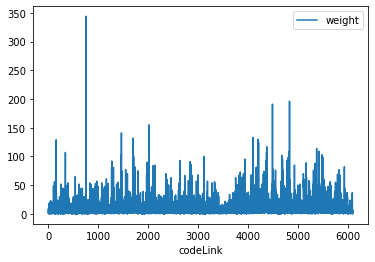

In [4]:
import matplotlib.pyplot as plt
dfgm.plot(y="weight")

In [5]:
file = "weights.csv"
fin = os.path.join(folder,file)
dfgm.to_csv(fin)

In [6]:
wdb = dfgm.drop(columns="sim",inplace=False)
file = "weights_2.csv"
fin = os.path.join(folder,file)
wdb.to_csv(fin)

## Snapshots

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

folder = "/Users/erick/Documents/GitHub/tsuevac"
datafolder = "data"
linksdbFile = os.path.join(folder,datafolder,"linksdb.csv")
nodesdbFile = os.path.join(folder,datafolder,"nodesdb.csv")
agentsdbFile = os.path.join(folder,datafolder,"agentsdb.csv")
linksdb = np.loadtxt(linksdbFile, delimiter=',', dtype=np.int) 
nodesdb = np.loadtxt(nodesdbFile, delimiter=',') 
agentsdb = np.loadtxt(agentsdbFile, delimiter=',') 
datafolder = "weights"
weightsdbFile = os.path.join(folder,datafolder,"weights_1526.csv")
weightsdb = np.loadtxt(weightsdbFile, delimiter=',',skiprows=1) 

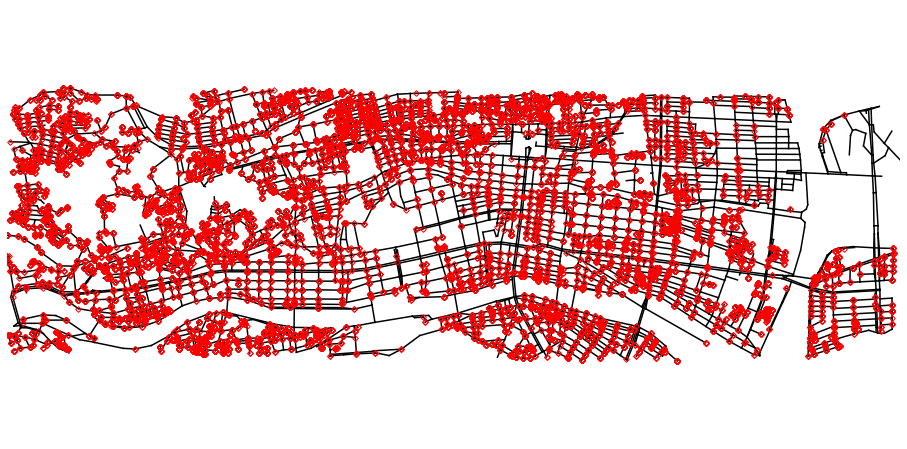

In [3]:
fig, ax = plt.subplots(figsize=(16,8))
for i in range(linksdb.shape[0]):
    ax.plot([nodesdb[int(linksdb[i,1]),1], nodesdb[int(linksdb[i,2]),1]],
            [nodesdb[int(linksdb[i,1]),2], nodesdb[int(linksdb[i,2]),2]], 
            c='k', lw=1.5)

coordX = [nodesdb[int(i),1] for i in agentsdb[:,4]]
coordY = [nodesdb[int(i),2] for i in agentsdb[:,4]]
ax.plot(coordX, coordY,'rD', ms=4, mfc= "none", mec= "r")
ax.axis("equal")
ax.set_axis_off()
ax.margins(0)
#plt.savefig("evacueesinitialnode.png",dpi=300)

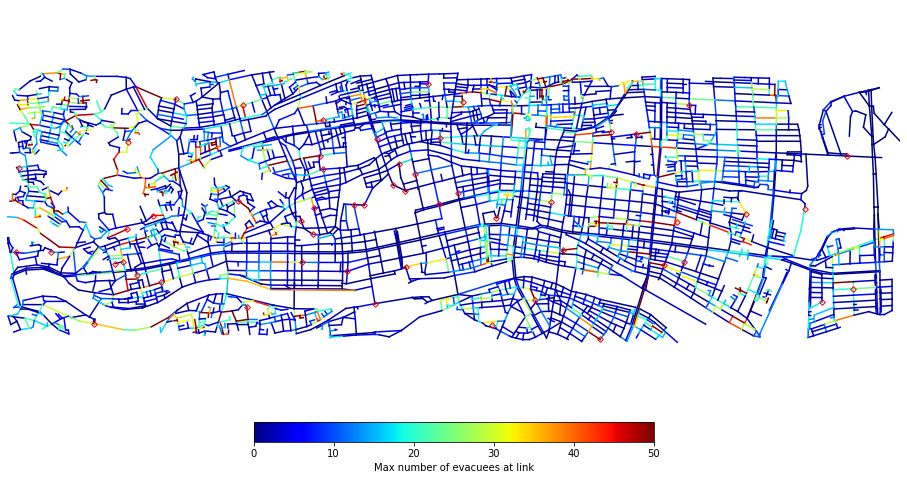

In [8]:
import matplotlib as mpl
import matplotlib.cm as cm 

norm = mpl.colors.Normalize(vmin=min(weightsdb[:,1]), vmax=50) #max(weightsdb[:,1]))
cmap=cm.jet

fig, ax = plt.subplots(figsize=(16,8))
for i in range(linksdb.shape[0]):
    ax.plot([nodesdb[int(linksdb[i,1]),1], nodesdb[int(linksdb[i,2]),1]],
            [nodesdb[int(linksdb[i,1]),2], nodesdb[int(linksdb[i,2]),2]], 
            c=cm.ScalarMappable(norm=norm, cmap=cmap).to_rgba(weightsdb[linksdb[i,0],1]), lw=1.5)

cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax,fraction=0.046, pad=0.04,orientation="horizontal")
cbar.set_label("Max number of evacuees at link")
indxEv = nodesdb[:,3] == 1.0
ax.plot(nodesdb[indxEv,1], nodesdb[indxEv,2],'rD', ms=4, mfc= "none", mec= "r")
ax.axis("equal")
ax.set_axis_off()
ax.margins(0)
plt.savefig("maxevacuees.png",dpi=300)

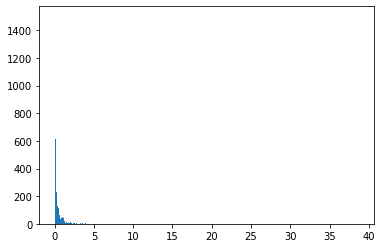

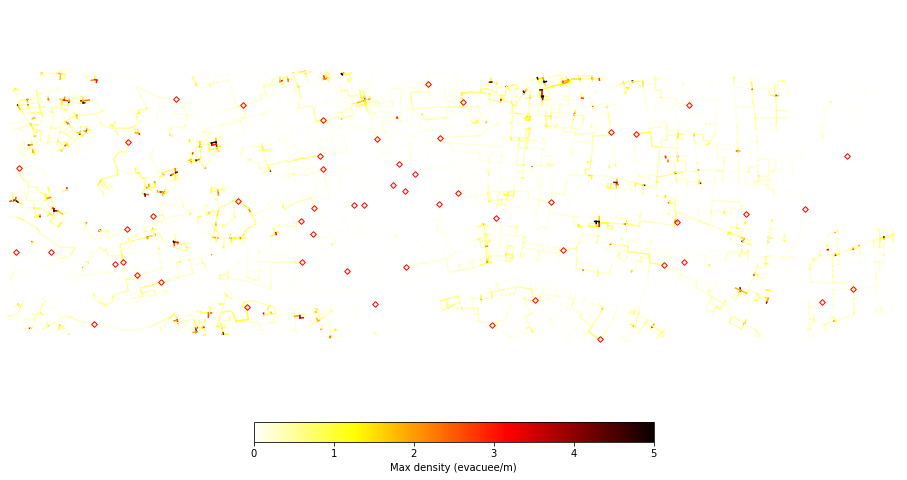

In [9]:
import matplotlib as mpl
import matplotlib.cm as cm 

#calculate density (num/length)(pers. per m)
den = weightsdb[:,1]/linksdb[:,3]
plt.hist(den, bins='auto')

norm = mpl.colors.Normalize(vmin=min(den), vmax=5) #max(weightsdb[:,1]))
cmap=cm.hot_r

fig, ax = plt.subplots(figsize=(16,8))
for i in range(linksdb.shape[0]):
    ax.plot([nodesdb[int(linksdb[i,1]),1], nodesdb[int(linksdb[i,2]),1]],
            [nodesdb[int(linksdb[i,1]),2], nodesdb[int(linksdb[i,2]),2]], 
            c=cm.ScalarMappable(norm=norm, cmap=cmap).to_rgba(den[linksdb[i,0]]), lw=1.5)

cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax,fraction=0.046, pad=0.04,orientation="horizontal")
cbar.set_label("Max density (evacuee/m)")
indxEv = nodesdb[:,3] == 1.0
ax.plot(nodesdb[indxEv,1], nodesdb[indxEv,2],'rD', ms=4, mfc= "none", mec= "r")
ax.axis("equal")
ax.set_axis_off()
ax.margins(0)
plt.savefig("maxdensity.png",dpi=300)

In [10]:
max(weightsdb[:,1])

344.0

In [11]:
max(den)

38.75

In [12]:
max(linksdb[:,3])

688

In [17]:
np.where(weightsdb[:,1]  == max(weightsdb[:,1]))

(array([753]),)

In [14]:
linksdb[753,3]

335

In [15]:
def setcolor(value):
    if value == 0:
        return 'red'
    else:
        return 'grey'

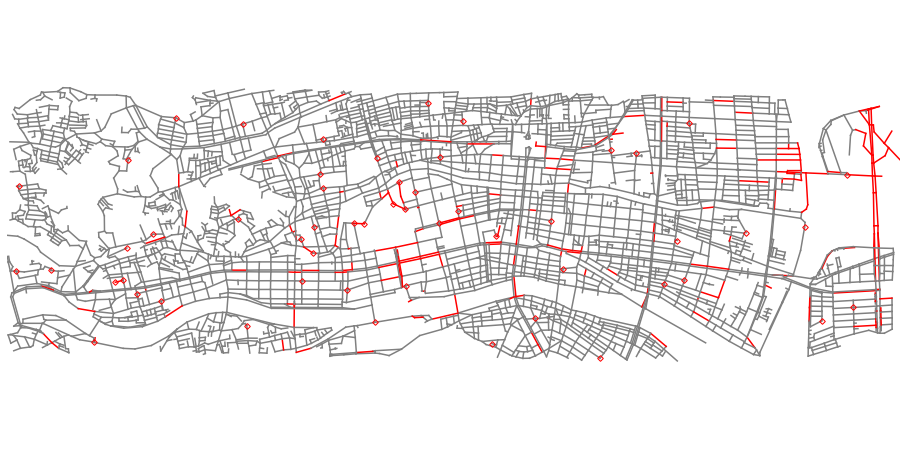

In [16]:
fig, ax = plt.subplots(figsize=(16,8))
for i in range(linksdb.shape[0]):
    ax.plot([nodesdb[int(linksdb[i,1]),1], nodesdb[int(linksdb[i,2]),1]],
            [nodesdb[int(linksdb[i,1]),2], nodesdb[int(linksdb[i,2]),2]], 
            c=setcolor(weightsdb[linksdb[i,0],1]), lw=1.5)

indxEv = nodesdb[:,3] == 1.0
ax.plot(nodesdb[indxEv,1], nodesdb[indxEv,2],'rD', ms=4, mfc= "none", mec= "r")
ax.axis("equal")
ax.set_axis_off()
ax.margins(0)
plt.savefig("unusedroads.png",dpi=300)

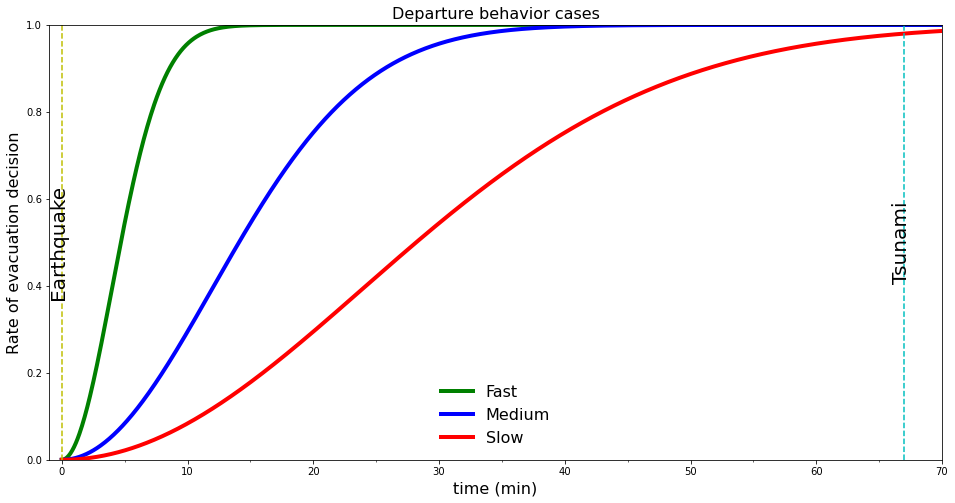

In [16]:
from scipy.stats import rayleigh
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import scipy.stats as stats
import math

fig, ax = plt.subplots(figsize=(16,8))

scale = 1

#immediate
loc = 0
meandeparture = 5
sc = np.sqrt(((meandeparture)**2)*2/np.pi)
x = np.linspace(0,70,1000)
ax.plot(x, scale*rayleigh.cdf(x,loc,sc),'g-', lw=4, alpha=1.0, label='Fast')
# ax.plot(x, scale*stats.norm.pdf(x, mu, sigma),'-',label='Fast')
#ax.legend(loc='best',frameon=False)

#tsunami
loc = 0
meandeparture = 15
sc = np.sqrt(((meandeparture)**2)*2/np.pi)
x = np.linspace(0,70, 1000)
ax.plot(x, scale*rayleigh.cdf(x,loc,sc),'b-', lw=4, alpha=1.0, label='Medium')
#ax.legend(loc='best',frameon=False)

#earthquake
loc = 0
meandeparture = 30
sc = np.sqrt(((meandeparture)**2)*2/np.pi)
x = np.linspace(0,70, 1000)
ax.plot(x, scale*rayleigh.cdf(x,loc,sc),'r-', lw=4, alpha=1.0, label='Slow')
#ax.legend(loc='best',frameon=False)

#earthquake struck time
x = np.linspace(0,0,400)
y = np.linspace(0,400,400)
ax.plot(x,y,'y--')

#tsunami arrival time
x = np.linspace(67,67,400)
y = np.linspace(0,400,400)
ax.plot(x,y,'c--')

#settings
ax.set(xlabel='time (min)', ylabel='Rate of evacuation decision',
       title='Departure behavior cases')
ax.legend(loc='best',frameon=False,fontsize=16)
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
ax.title.set_size(16)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))
ax.text(-1,scale/2,"Earthquake",fontsize=20,rotation=90,verticalalignment='center')
ax.text(66,scale/2,"Tsunami",fontsize=20,rotation=90,verticalalignment='center')
plt.ylim(0,1)#scale/4)
plt.xlim(-1,70)

plt.savefig('BehavioralCurves.png', dpi=600, facecolor='w', edgecolor='w',
        orientation='landscape', format='png',
        transparent=True, bbox_inches='tight', pad_inches=0.1,
        metadata=None)

In [81]:
import pandas as pd
df_s = pd.read_csv("../results/agents_startcondition.csv",header=None,usecols=[0,1,8,9],names=["x0","y0","StartNode","StartTime"])
df_f = pd.read_csv("../results/agents_finalcondition.csv",header=None,usecols=[0,1,8],names=["xf","yf","FinalNode"])
DF = pd.concat([df_s,df_f],axis=1)

In [82]:
DF.head()

x0          y0  StartNode  StartTime         xf          yf  \
0  361080.87  3714135.37       1534        351  360861.99  3714060.58   
1  361305.89  3714515.94       4152        171  361493.99  3714247.56   
2  361325.22  3714227.09       1541       1411  361493.99  3714247.56   
3  361268.29  3714237.86       3152        624  361493.99  3714247.56   
4  361266.25  3714266.97       3155       1066  361493.99  3714247.56   

   FinalNode  
0       4089  
1       2960  
2       2960  
3       2960  
4       2960

In [83]:
DF.to_csv("evacuees_start_end_departure.csv")

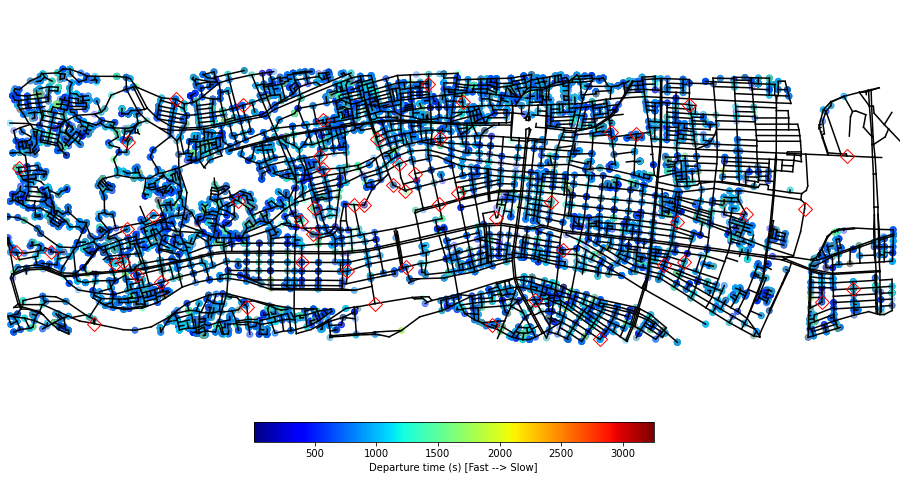

In [48]:
import matplotlib as mpl
import matplotlib.cm as cm 

norm = mpl.colors.Normalize(vmin=DF["St"].min(), vmax=DF["St"].max()) #max(weightsdb[:,1]))
cmap=cm.jet

fig, ax = plt.subplots(figsize=(16,8))
#network
for i in range(linksdb.shape[0]):
    ax.plot([nodesdb[int(linksdb[i,1]),1], nodesdb[int(linksdb[i,2]),1]],
            [nodesdb[int(linksdb[i,1]),2], nodesdb[int(linksdb[i,2]),2]], 
            c='k', lw=1.5)

#agents
coordX = [nodesdb[int(i),1] for i in agentsdb[:,4]]
coordY = [nodesdb[int(i),2] for i in agentsdb[:,4]]
#create colors
collist = [cm.ScalarMappable(norm=norm, cmap=cmap).to_rgba(i) for i in DF["St"]]

ax.scatter(coordX, coordY,c=collist,alpha=0.3)
cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax,fraction=0.046, pad=0.04,orientation="horizontal")
cbar.set_label("Departure time (s) [Fast --> Slow]")

#shelters
indxEv = nodesdb[:,3] == 1.0
ax.plot(nodesdb[indxEv,1], nodesdb[indxEv,2],'rD', ms=10, mfc= "none", mec= "r")
ax.axis("equal")
ax.set_axis_off()
ax.margins(0)
#plt.savefig("evacueesinitialnode.png",dpi=300)

In [63]:
#plot one agent
import matplotlib as mpl
import matplotlib.cm as cm 

def ToPlotAgent(num):
    fig, ax = plt.subplots(figsize=(16,8))
    #network
    for i in range(linksdb.shape[0]):
        ax.plot([nodesdb[int(linksdb[i,1]),1], nodesdb[int(linksdb[i,2]),1]],
                [nodesdb[int(linksdb[i,1]),2], nodesdb[int(linksdb[i,2]),2]], 
                c='grey', lw=1.0)

    #agents
    coordX = nodesdb[int(agentsdb[num,4]),1]
    coordY = nodesdb[int(agentsdb[num,4]),2]

    ax.scatter(coordX, coordY,c='b',edgecolors='face',alpha=1.0,label="Agent %d" %num)

    #shelters
    indxEv = DF["Fnode"][num]
    ax.plot(nodesdb[indxEv,1], nodesdb[indxEv,2],'rD', ms=10, mfc= "r", mec= "r",label="Shelter %d" %indxEv)
    indxEv = nodesdb[:,3] == 1.0
    ax.plot(nodesdb[indxEv,1], nodesdb[indxEv,2],'rD', ms=10, mfc= "none", mec= "r")
    ax.axis("equal")
    ax.set_axis_off()
    ax.margins(0)
    ax.legend()
    name = f"EvacueeStartEnd_{num}.png"
    plt.savefig(name,dpi=300)

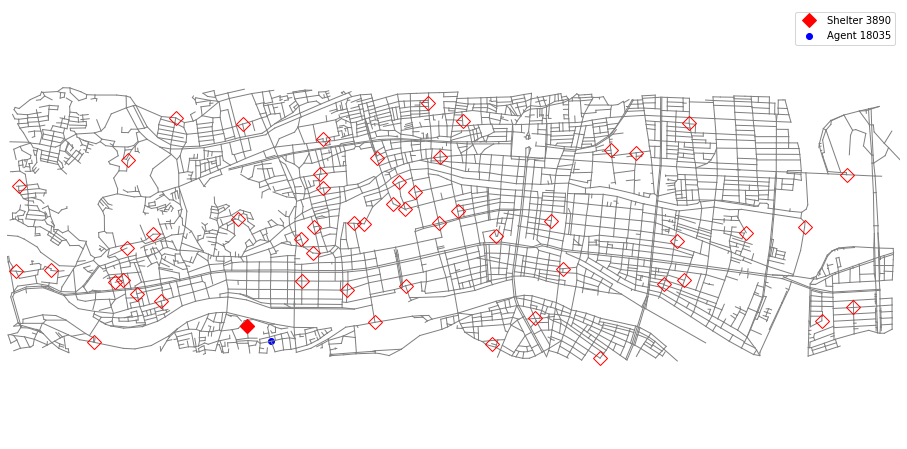

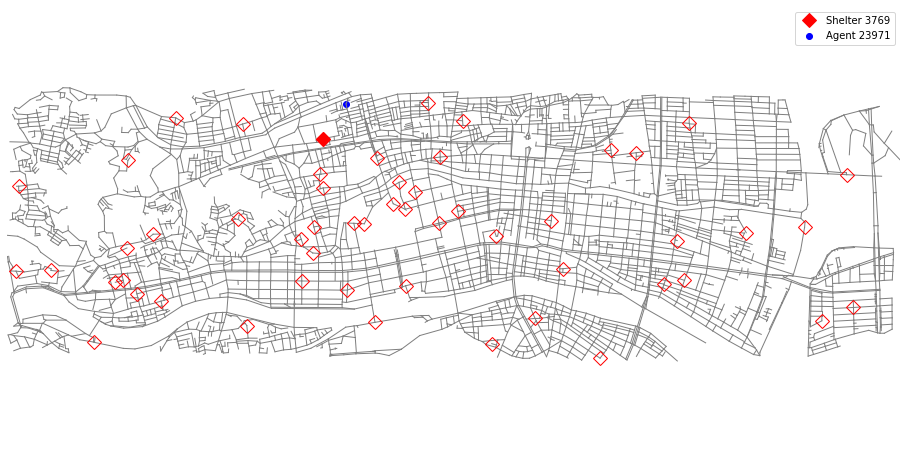

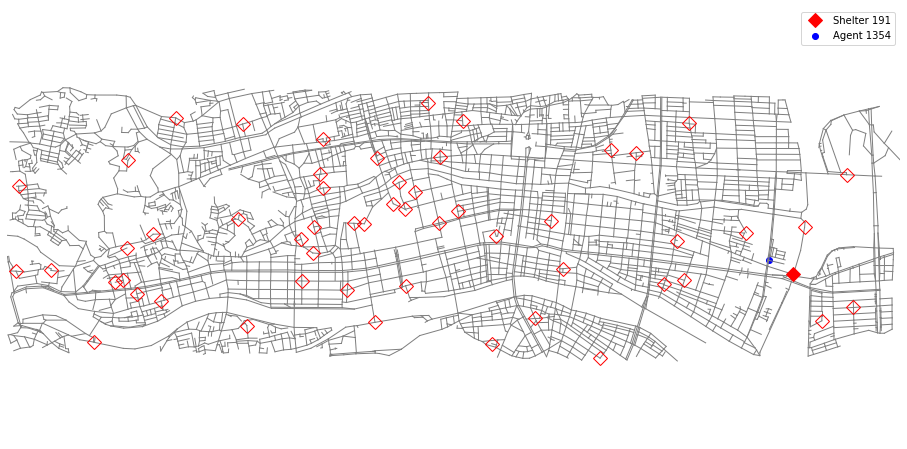

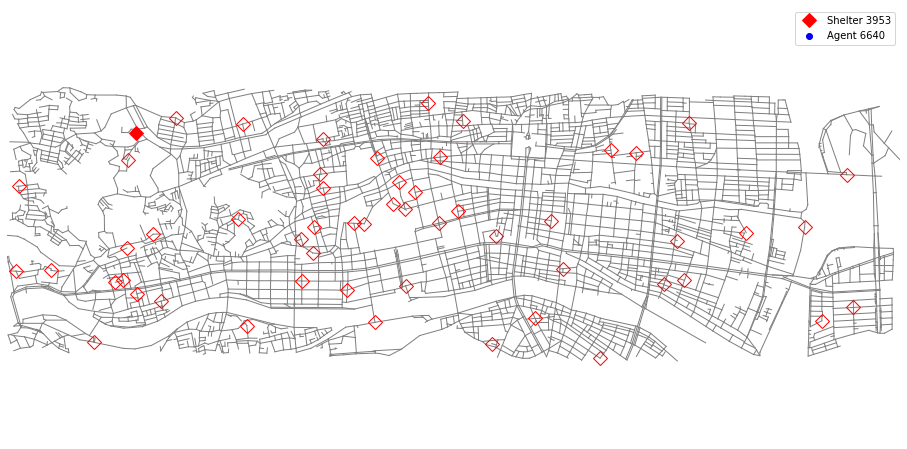

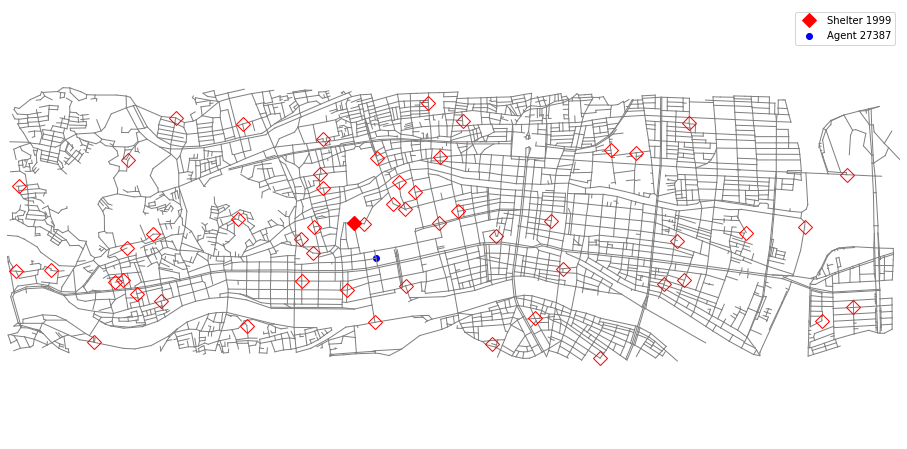

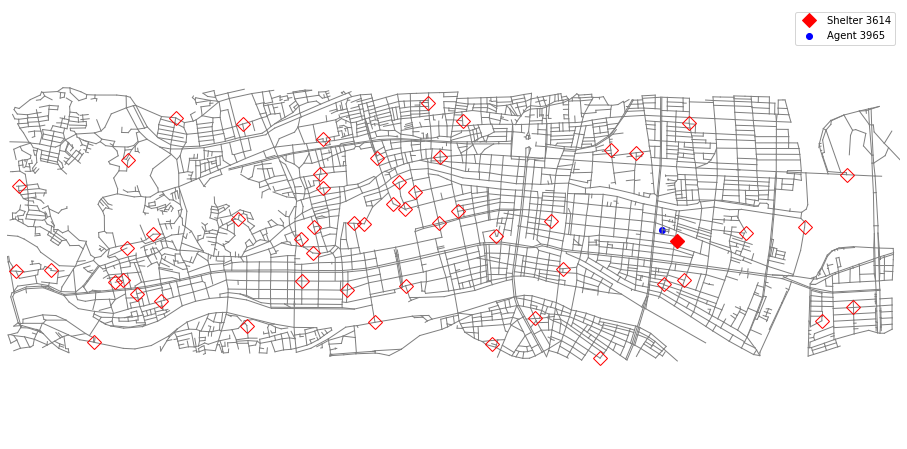

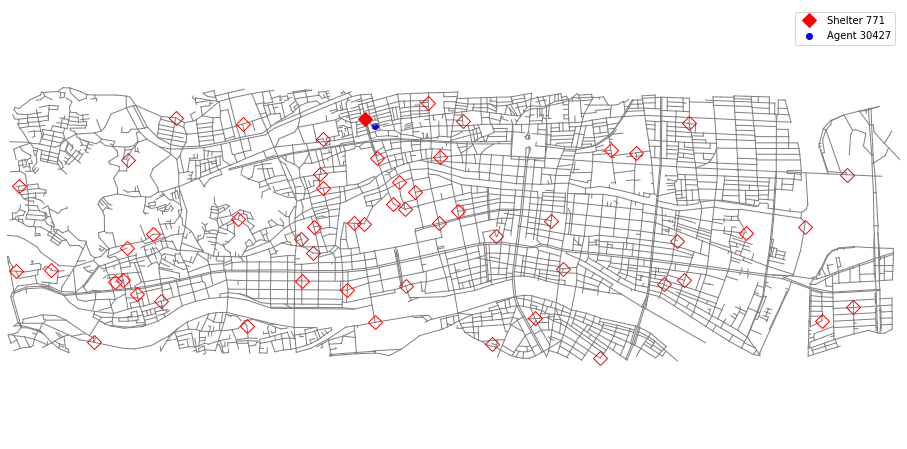

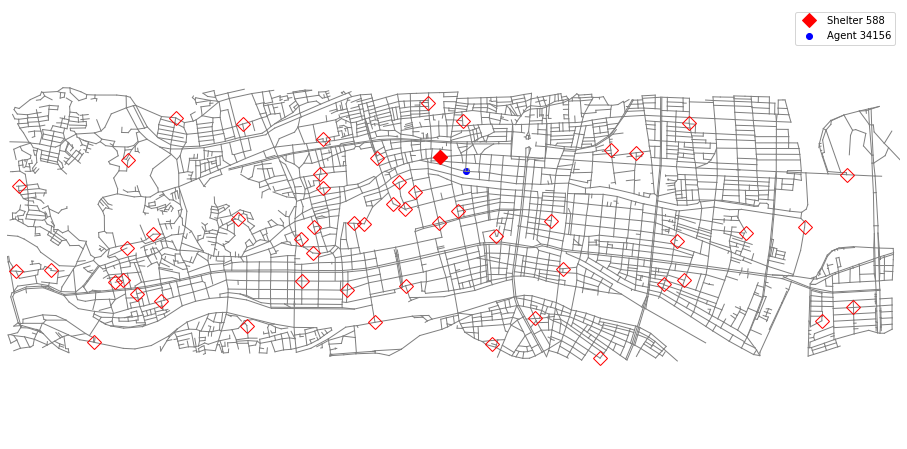

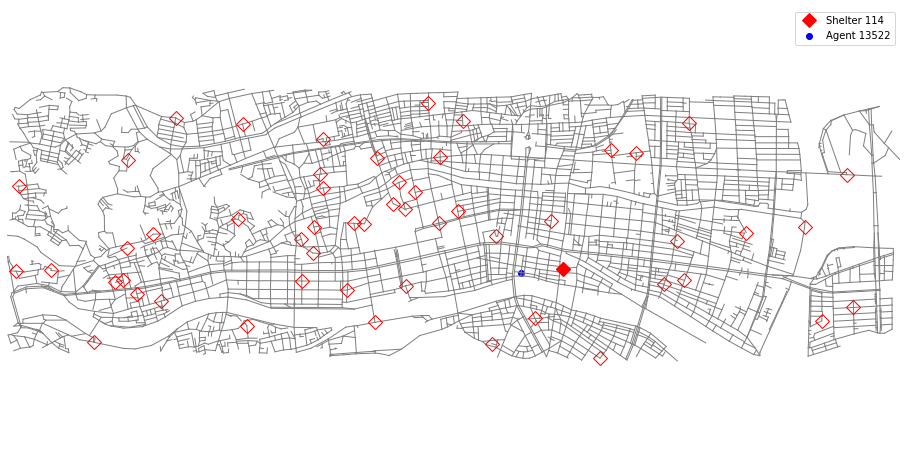

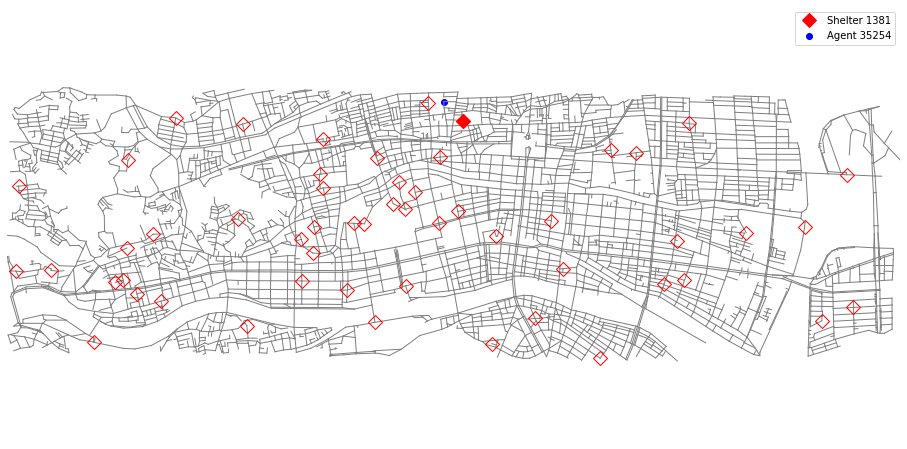

In [65]:
test = np.random.randint(DF.shape[0], size=10)
for i in test: #range(11):#DF.shape[0]+1):
    ToPlotAgent(i)

In [6]:
import pandas as pd

dfsim = pd.read_csv("/Users/erick/ReGID Dropbox/Erick Mas/ToDo/Quantum/Reinforcement Learning/SARSA_Kochi_OSM/survivor-time_v3.csv",header=None)

In [7]:
dfsim.head()

0     1     2     3     4     5     6     7     8     9     ...  1517  \
0     1     0     0     0     0     0     0     0     0     0  ...     0   
1     6   332     0   332   332   332   332   332     0   332  ...   332   
2    11   332   332   332   332   332   332   332   332   332  ...   332   
3    16   332   332   332   332   332   332   332   332   332  ...   332   
4    21   332   332   332   332   332   332   332   332   332  ...   332   

   1518  1519  1520  1521  1522  1523  1524  1525  1526  
0     0     0     0     0     0     0   332     0     0  
1   332     0   332   332     0     0   332   332     0  
2   332   332   332   332   332   332   332   332   332  
3   332   332   332   332   332   332   332   332   332  
4   332   332   332   332   332   332   332   332   332  

[5 rows x 1527 columns]

In [41]:
r = dfsim.iloc[-1,1:]
r[0:1]

1    20193
Name: 359, dtype: int64

In [44]:
x = [ i for i in range(2,len(r)+1) ]
y = [ r[0:i].std() for i in range(2,len(r)+1)]

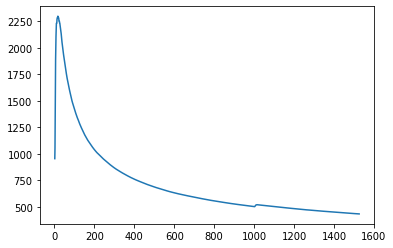

In [45]:
import matplotlib.pyplot as plt

plt.plot(x,y)

In [50]:
import pandas as pd

df5000 = pd.read_csv("/Users/erick/ReGID Dropbox/Erick Mas/ToDo/Quantum/Reinforcement Learning/SARSA_Kochi_OSM/state/survivorsPerSim.csv",header=None)

In [66]:
df5000[1][0:2]

0    3642
1    3538
Name: 1, dtype: int64

In [72]:
x = [ i for i in range(2,df5000.shape[0])]
ymean = [ df5000[1][0:i].mean() for i in range(2,df5000.shape[0])]
ystd = [ df5000[1][0:i].std() for i in range(2,df5000.shape[0])]

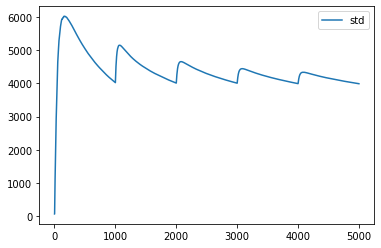

In [75]:
import matplotlib.pyplot as plt

# ax1 = plt.plot(x,ymean,label="mean")
ax2 = plt.plot(x,ystd,label="std")
plt.legend()